In [1]:
%matplotlib inline
%load_ext autoreload

%autoreload 2

In [2]:
import json
import gff3_parsing
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import glob

In [34]:
def analyze_genome(dataframe, energy_dict, gaps = (4,10), expected_len = 20):
    
    for index in dataframe.index:
        upstream = dataframe.loc[index,"upstream_sequence"]
        test_string = upstream.replace("T", "U")
        if len(test_string) != expected_len:
            continue
        if test_string.count("A") + test_string.count("U") +\
                                    test_string.count("C") + test_string.count("G") != expected_len:
            continue
            
        energy_list = []
        for gap in range(gaps[0],gaps[1]+1):
             energy_list.append(energy_dict[test_string[-gap - 6: -gap]])

        dataframe.at[index, "energy_binding"] = min(energy_list)
    return dataframe

In [35]:
with open('../Data/examples_for_testing/energyRef_CCUCCU_mfe.json', 'r') as infile:
       energy_dict = json.load(infile)


host_df, host_genome = gff3_parsing.compile_sequences("../Data/examples_for_testing/ecoli.gff3",\
                                                    "../Data/examples_for_testing/ecoli.fasta", 20)

host_df = analyze_genome(host_df, energy_dict)

In [44]:
mean_difs = []

p_values = []
for gff_file in glob.glob("../Data/ecoli_viruses/562_rep_viruses_concat/*.gff"):
    #print(gff_file)
    fasta_file = "../Data/ecoli_viruses/562_rep_viruses/" + gff_file.split("/")[-1].replace("gff", "fasta")
    
    viral_df, viral_genome = gff3_parsing.compile_sequences(gff_file,fasta_file, 20)
    
    if viral_df.shape[0] < 50:
        print("ignoring one")
        continue
    viral_df = analyze_genome(viral_df, energy_dict)

    #print(stats.ranksums(host_df["energy_binding"], viral_df["energy_binding"]))
    rstat, p_value = stats.ranksums(host_df["energy_binding"], viral_df["energy_binding"])
    p_values.append(p_value)
    
    mean_difs.append(np.mean(viral_df["energy_binding"]) - np.mean(host_df["energy_binding"]))
    

ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one
ignoring one


In [42]:
viral_df.shape

(51, 12)

In [16]:
# print(len(mean_difs))
# print(len(p_values))
# print(mean_difs)
# print(p_values)

combined_dict = {"p_values":p_values, "mean_difs":mean_difs}



combined_df = pd.DataFrame(combined_dict)

In [18]:
combined_df.head()

combined_df.to_csv("stats_df.tsv", sep = ",")

# To-Do: 

1. How many/what percent/proportion of p-values are < 0.01
2. distribution of p-values, mean_difs
3. Count the negatives (put as fraction /373)
4. How many cases where host is stronger, is the p_value still significant?
5. Scatterplot of p_values, mean_difs


In [46]:
#1
significant_pvalues = []
for p in p_values:
    if p <= 0.01:
        significant_pvalues.append(p)
        
print(len(significant_pvalues))

147


In [47]:
len(p_values)

300

In [48]:
#proportion of significant p-values
len(significant_pvalues)/len(p_values)

0.49

In [50]:
zippy = zip(mean_difs, p_values)
len([i for i in zippy if i[1] < 0.01 and i[0]>0])

4

In [33]:
# list(zippy)

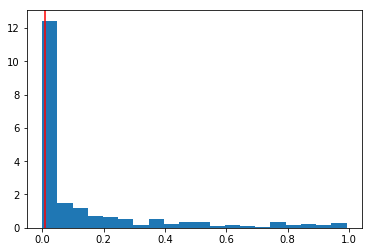

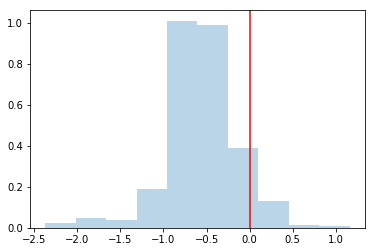

In [8]:
#2
fig, ax = plt.subplots()
ax.hist(p_values, 20, density = True)
ax.axvline(0.01, color = "r")


fig2, ax2 = plt.subplots()
ax2.hist(mean_difs, density= True, alpha = 0.3)
ax2.axvline(0.0, color = "r")

In [9]:
#3

negative_values = []
for neg in mean_difs:
    if neg < 0:
        negative_values.append(neg)
        
len(negative_values)

344

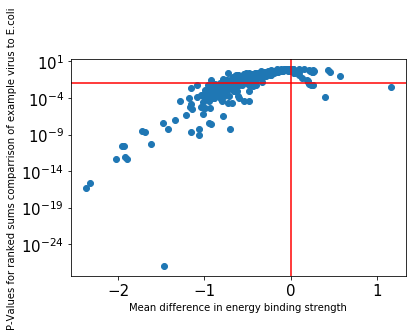

In [11]:
fig, ax = plt.subplots()
ax.set_ylabel("P-Values for ranked sums comparrison of example virus to E.coli")
ax.set_xlabel("Mean difference in energy binding strength")
ax.tick_params(labelsize = 15)
ax.semilogy(mean_difs,p_values, marker = "o", linestyle = "")
ax.axvline(0, color = "r")
ax.axhline(.01, color = "r")
#ax.set_ylim(10e-12, 10)

#hides 2 data points 